In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [25]:
mpg_df = pd.read_csv("auto_mpg.csv", delim_whitespace=True)

In [26]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<AxesSubplot:xlabel='mpg', ylabel='displacement'>

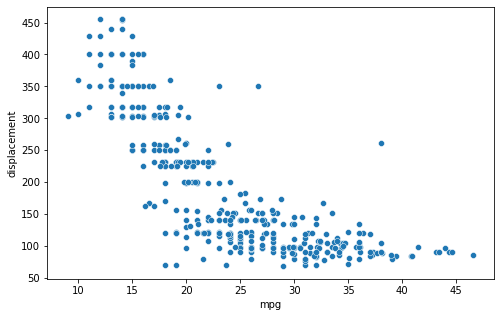

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=mpg_df["mpg"], y=mpg_df["displacement"])

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

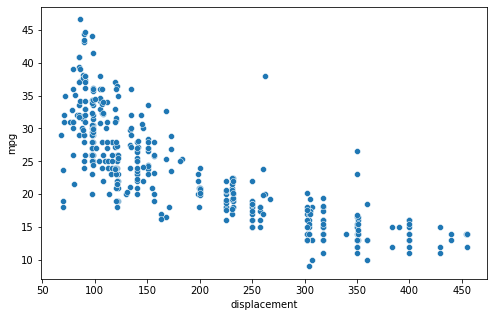

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=mpg_df["displacement"], y=mpg_df["mpg"])

In [66]:
mpg_displacement = pd.DataFrame(mpg_df, columns=["mpg", "displacement"])
mpg_displacement.head()

,mpg,displacement
0,18.0,307.0
1,15.0,350.0
2,18.0,318.0
3,16.0,304.0
4,17.0,302.0


In [43]:
from sklearn import preprocessing

normalized_mpg = preprocessing.normalize(mpg_displacement)


In [52]:
from sklearn.cluster import KMeans
import centroid_initialization as cent_init

In [55]:
print(normalized_mpg)

[[0.0585314  0.99828557]
 [0.04281784 0.9990829 ]
 [0.05651331 0.99840185]
 [0.05255883 0.99861783]
 [0.05620242 0.9984194 ]
 [0.03494368 0.99938928]
 [0.03082235 0.99952488]
 [0.03180209 0.99949419]
 [0.03075468 0.99952696]
 [0.03843312 0.99926117]
 [0.03913449 0.99923395]
 [0.04114161 0.99915333]
 [0.03747366 0.99929762]
 [0.03075468 0.99952696]
 [0.20775522 0.97818085]
 [0.11043153 0.99388373]
 [0.09008449 0.99593413]
 [0.10442593 0.99453267]
 [0.26815606 0.96337549]
 [0.25890199 0.9659036 ]
 [0.2216211  0.97513286]
 [0.21886116 0.97575601]
 [0.23372653 0.97230237]
 [0.21008086 0.97768401]
 [0.10494492 0.99447804]
 [0.02776707 0.99961442]
 [0.03255602 0.99946991]
 [0.03457052 0.99940226]
 [0.0295923  0.99956205]
 [0.26815606 0.96337549]
 [0.19611614 0.98058068]
 [0.21601547 0.97638994]
 [0.24718574 0.96896812]
 [0.08162328 0.99666325]
 [0.07093199 0.99748115]
 [0.06784333 0.99769599]
 [0.07578146 0.99712445]
 [0.07735374 0.99700371]
 [0.03996804 0.99920096]
 [0.03497858 0.99938806]


In [57]:
init_centroids = np.array([[0.01,0.02],[0.01,0.015],[0.01,0.022],[0.01,0.023]])
kmeans = KMeans(n_clusters=4, init=init_centroids, n_init=1)
kmeans.fit(normalized_mpg)

KMeans(init=array([[0.01 , 0.02 ],
       [0.01 , 0.015],
       [0.01 , 0.022],
       [0.01 , 0.023]]),
       n_clusters=4, n_init=1)

In [68]:
n_clusters=4
plus_centroids = cent_init.plus_plus(normalized_mpg, n_clusters)
print(plus_centroids)

[[0.0585314  0.99828557]
 [0.29716525 0.95482606]
 [0.14353631 0.98964505]
 [0.44009482 0.89795131]]


In [63]:
random_centroids = cent_init.random(normalized_mpg, n_clusters)
print(random_centroids)

[[0.25890199 0.9659036 ]
 [0.39004497 0.92079581]
 [0.15554615 0.98782863]]


In [64]:
naive_centroids = cent_init.naive_sharding(normalized_mpg, n_clusters)
print(naive_centroids)

[[0.05004507 0.94596901]
 [0.15094392 0.98721149]
 [0.32131777 1.01373254]]


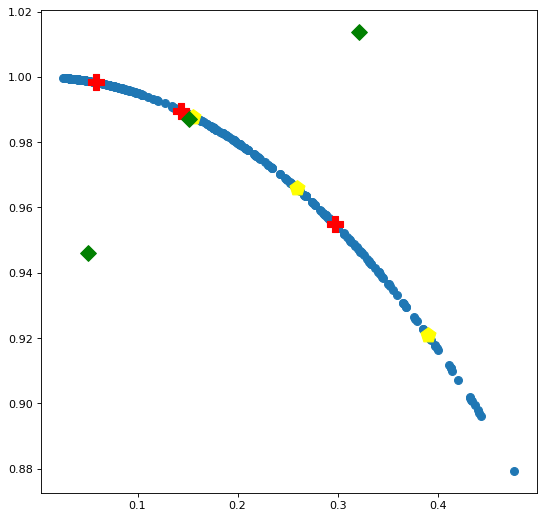

In [65]:
def centroid_plots(X, rand, plus, naive):
    fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
    
    plt.scatter(X[:, 0], X[:, 1],
                s=50,
                marker='o',
                label='cluster 1')

    plt.scatter(rand[:, 0], 
                rand[:, 1],
                s=200, c='yellow',
                marker='p')

    plt.scatter(plus[:, 0],
                plus[:, 1],
                s=200, c='red',
                marker='P')

    plt.scatter(naive[:, 0], 
                naive[:, 1],
                s=100, c='green',
                marker='D');

centroid_plots(normalized_mpg, random_centroids, plus_centroids, naive_centroids)

In [72]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [70]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

NameError: name 'save_fig' is not defined

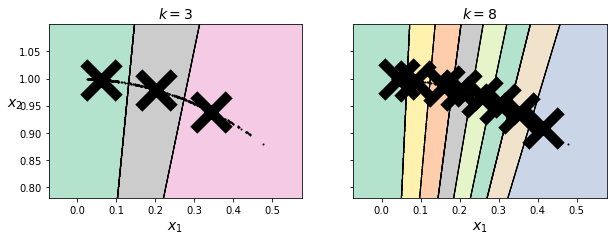

In [73]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, normalized_mpg, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()